In [1]:
import pandas as pd
import os

In [2]:
file_df = []
for file in os.listdir("weibo2"):
    if file.endswith(".xlsx"):
        file_df.append(pd.read_excel(f"weibo2/{file}"))

df = pd.concat(file_df)
print(len(df))

df = df.drop_duplicates(subset="博文独立网址")
df = df[df["博文"].str.contains("医|药")]
print(len(df))

df[["转发数", "评论数", "点赞数"]] = df[["转发数", "评论数", "点赞数"]].apply(
    lambda col: pd.to_numeric(col, errors="coerce").fillna(0).astype(int)
)

df = df.sort_values("转发数", ascending=False)
df[df["博文"].str.contains("展开")].to_excel("weibo_not_collapsed.xlsx", index=False)
df[~df["博文"].str.contains("展开")].to_excel("weibo_all_collapsed.xlsx", index=False)

df["博文独立网址"] = df["博文独立网址"].str.strip("?refer_flag=1001030103_")

df["发布时间"] = pd.to_datetime(
    "2025年" + df["发布时间"], format="%Y年%m月%d日 %H:%M"  # Add the assumed year
)

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook con

73078
19555


In [3]:
# Load the fulltext dataset
fulltext = pd.read_excel(
    "weibo_fulltext/temp_微博博文展开全部采集_规则_1_列表_20250301073520921.xlsx"
)
# If fulltext is a DataFrame with potentially multiple rows
for idx, row in fulltext.iterrows():
    if pd.notna(row["博文"]):
        df.loc[df["博文独立网址"] == row["博文独立网址"], "博文"] = row["博文"]

# Load the fulltext dataset
fulltext = pd.read_excel(
    "weibo_fulltext/temp_微博博文展开全部采集_规则_1_列表_20250302043232700.xlsx"
)
# If fulltext is a DataFrame with potentially multiple rows
for idx, row in fulltext.iterrows():
    if pd.notna(row["博文"]):
        df.loc[df["博文独立网址"] == row["博文独立网址"], "博文"] = row["博文"]

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
df[df["博文"].str.contains("展开")].to_excel("weibo_not_collapsed.xlsx", index=False)

In [5]:
# 给所有 URL 添加相同的参数
df["博文独立网址"] = df["博文独立网址"] + "?refer_flag=1001030103_"
df = df[df["博文"].str.contains("医|药")]

In [6]:
df[df["博文"].str.contains("展开c")].to_excel("weibo_not_collapsed.xlsx", index=False)
df[~df["博文"].str.contains("展开c")].to_excel("weibo_all_collapsed.xlsx", index=False)

In [7]:
data = df[~df["博文"].str.contains("展开c")]
data = data[
    [
        "博主id",
        "博主",
        "博主是否认证",
        "博文",
        "博文独立网址",
        "发布时间",
        "发布终端",
        "转发数",
        "评论数",
        "点赞数",
    ]
]
data.columns = [
    "author_id",
    "author",
    "author_type",
    "post",
    "post_url",
    "date",
    "source",
    "repost",
    "comments",
    "likes",
]

In [8]:
data[["author", "post", "date"]]

,author,post,date
104,三联生活周刊,【#进口药退出公立医院# 】2024年12月30日，距离开标日18天后，第十批国家药品集中采...,2025-01-13 18:30:00
6695,乐子人也,财新的报道——上海20名政协委员联名提案： 集采之下的国产仿制药现状，麻药不睡，血压不降，泻...,2025-01-18 14:50:00
1813,t0mbkeeper,“血压不降、麻醉不睡、泻药不泻”，瑞金医院副院长郑民华等 20 位委员，共同提交了一份“关于...,2025-01-17 21:47:00
3295,雪影甜玉母鸡,推上看到的: 在日本人写的ABO小说里，大体上，抑制剂费用总是由医保承担，政府不仅会负担民众...,2025-01-18 15:08:00
242,Summer最聪明,这两天，北京和上海政协委员纷纷提案，希望国家关注集采药效果不佳、副反应大的问题，在微博上引起...,2025-01-20 14:06:00
...,...,...,...
158,志坚意定,//@小草根读者雷有国:医药由于集采，还在下行通道，要极致耐心，等到极为便宜，才是买入机会。,2025-01-02 08:29:00
160,卷无邪,医院集采了中药注射液，中成药先说中药注射液，本质不是中药，是用西药的研究方法，把中药制成注射...,2025-01-02 08:18:00
164,连板大本贏家林晓英,行业财经要闻1. 我国首部能源法正式施行 2025年将新增风电光伏装机约2亿千瓦2. 新华社...,2025-01-02 07:51:00
165,yr902018,//@真诚的知识分享:转：医药集采之后，商业保险公司的“百万医疗”就基本上失去存在的意义了！...,2025-01-02 07:45:00


In [9]:
import pandas as pd
import re

def parse_comments(df):
    """
    完整解析包含嵌套评论的数据集，将嵌套评论拆分为独立的评论记录
    同时记录每条评论所回复的前一条评论内容，并保留原始数据集的所有字段
    
    参数:
    df: 包含原始数据的DataFrame，包含'author_id', 'author', 'author_type', 'post', 'post_url', 
        'date', 'source', 'repost', 'comments', 'likes'等列
    
    返回:
    解析后的DataFrame，包含所有独立评论及其回复的评论，保留原始数据的所有字段
    """
    # 创建结果列表
    result_data = []
    
    # 定义正则表达式来匹配转发模式
    repost_pattern = r"//@([^:]+):(.*)"
    
    # 遍历原始数据
    for _, row in df.iterrows():
        # 获取原始数据的所有字段
        author_id = row.get("author_id", "")
        chain_author = row["author"]
        author_type = row.get("author_type", "")
        full_post = row["post"]
        post_url = row.get("post_url", "")
        date = row["date"]
        source = row.get("source", "")
        repost_count = row.get("repost", None)
        comments_count = row.get("comments", None)
        likes_count = row.get("likes", None)
        
        # 用于存储解析出的评论链
        comment_chain = []
        
        # 初始化待处理的评论
        remaining_content = full_post
        current_author = chain_author
        
        while True:
            # 查找下一个转发评论
            match = re.search(repost_pattern, remaining_content)
            
            if match:
                # 提取当前作者的评论(不包括转发部分)
                current_content = remaining_content[:match.start()].strip()
                
                # 记录当前评论
                comment_chain.append({
                    "author": current_author, 
                    "content": current_content
                })
                
                # 更新为下一个作者和剩余内容
                current_author = match.group(1)
                remaining_content = match.group(2).strip()
            else:
                # 没有更多转发，添加最后一条评论
                comment_chain.append({
                    "author": current_author, 
                    "content": remaining_content
                })
                break
        
        # 逆序处理评论链，从最早的评论开始
        comment_chain.reverse()
        
        # 添加额外信息并建立评论之间的关系
        for i, comment in enumerate(comment_chain):
            # 确定是否为原始作者
            is_original_author = (i == len(comment_chain) - 1)
            
            comment_info = {
                # 原始数据字段
                "author_id": author_id if is_original_author else "",  # 仅原始作者保留ID
                "author": comment["author"],
                "author_type": author_type if is_original_author else "",  # 仅原始作者保留类型
                "content": comment["content"],
                "content_url": post_url if is_original_author else "",  # 仅原始作者保留URL
                "date": date,
                "source": source if is_original_author else "",  # 仅原始作者保留来源
                "repost": repost_count if is_original_author else "",  # 仅原始作者保留转发数
                "comments": comments_count if is_original_author else "",  # 仅原始作者保留评论数
                "likes": likes_count if is_original_author else "",  # 仅原始作者保留点赞数
                
                # 额外分析字段
                "chain_author": chain_author,
                "content_len": len([c for c in comment["content"] if '\u4e00' <= c <= '\u9fff']),  # 修正中文字符计数
                "position": (
                    "start" if i == 0 
                    else ("end" if i == len(comment_chain) - 1 else "middle")
                ),
                "index_in_chain": i,
            }
            
            # 添加前一条评论的信息
            if i > 0:
                comment_info["previous_author"] = comment_chain[i - 1]["author"]
                comment_info["previous_content"] = comment_chain[i - 1]["content"]
            else:
                comment_info["previous_author"] = None
                comment_info["previous_content"] = None
                
            result_data.append(comment_info)
    
    # 创建新的DataFrame
    result_df = pd.DataFrame(result_data)
    return result_df

parsed_df = parse_comments(data)

In [10]:
topic_df = parsed_df[parsed_df.content_len > 1]
topic_df

,author_id,author,author_type,content,content_url,date,source,repost,comments,likes,chain_author,content_len,position,index_in_chain,previous_author,previous_content
0,1191965271,三联生活周刊,微博官方认证,【#进口药退出公立医院# 】2024年12月30日，距离开标日18天后，第十批国家药品集中采...,https://weibo.com/1191965271/P9pjHs3Y8?refer_f...,2025-01-13 18:30:00,NaN,21850,4442,9699,三联生活周刊,245,start,0,None,None
1,5766907756,乐子人也,微博个人认证,财新的报道——上海20名政协委员联名提案： 集采之下的国产仿制药现状，麻药不睡，血压不降，泻...,https://weibo.com/5766907756/Pa919drU7?refer_f...,2025-01-18 14:50:00,NaN,13690,795,18992,乐子人也,40,start,0,None,None
2,6827625527,t0mbkeeper,微博个人认证,“血压不降、麻醉不睡、泻药不泻”，瑞金医院副院长郑民华等 20 位委员，共同提交了一份“关于...,https://weibo.com/6827625527/Pa2jWFvCZ?refer_f...,2025-01-17 21:47:00,微博视频号,13281,183,18953,t0mbkeeper,66,start,0,None,None
3,7779120050,雪影甜玉母鸡,NaN,推上看到的: 在日本人写的ABO小说里，大体上，抑制剂费用总是由医保承担，政府不仅会负担民众...,https://weibo.com/7779120050/Pa98kmUIo?refer_f...,2025-01-18 15:08:00,iPhone 16 Pro,7854,410,38973,雪影甜玉母鸡,160,start,0,None,None
4,1231148270,Summer最聪明,微博个人认证,这两天，北京和上海政协委员纷纷提案，希望国家关注集采药效果不佳、副反应大的问题，在微博上引起...,https://weibo.com/1231148270/ParA86Jn6?refer_f...,2025-01-20 14:06:00,微博网页版,5284,994,16389,Summer最聪明,2587,start,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60221,,小草根读者雷有国,,医药由于集采，还在下行通道，要极致耐心，等到极为便宜，才是买入机会。,,2025-01-02 08:29:00,,,,,志坚意定,29,start,0,None,None
60223,6270728135,卷无邪,NaN,医院集采了中药注射液，中成药先说中药注射液，本质不是中药，是用西药的研究方法，把中药制成注射...,https://weibo.com/6270728135/P7FBObui4?refer_f...,2025-01-02 08:18:00,Xiaomi 15,0,0,1,卷无邪,109,start,0,None,None
60224,5681923486,连板大本贏家林晓英,微博个人认证,行业财经要闻1. 我国首部能源法正式施行 2025年将新增风电光伏装机约2亿千瓦2. 新华社...,https://weibo.com/5681923486/P7FqQAIjG?refer_f...,2025-01-02 07:51:00,热门财经Android,0,2,166,连板大本贏家林晓英,284,start,0,None,None
60225,,真诚的知识分享,,转：医药集采之后，商业保险公司的“百万医疗”就基本上失去存在的意义了！“百万医疗”推出的初衷...,,2025-01-02 07:45:00,,,,,yr902018,103,start,0,None,None


In [11]:
original_topic_df = topic_df[topic_df['previous_author'].isna()]

In [19]:
pd.DataFrame(classifier(original_topic_df['content'].iloc[0], truncation=True)[0])

,label,score
0,positive,0.563943
1,neutral,0.219666
2,negative,0.216391


In [ ]:
import pandas as pd
from tqdm import tqdm
from transformers import pipeline

# 初始化 tqdm，使其与 pandas 兼容
tqdm.pandas(desc='Processing')

classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
)

In [21]:
def analyze_sentiment(text):
    results = classifier(text, truncation=True)[0]
    top_emotion = max(results, key=lambda x: x["score"])
    return top_emotion

sents = original_topic_df['content'].progress_apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

Processing: 100%|██████████| 18258/18258 [05:53<00:00, 51.59it/s] 


In [ ]:
original_topic_df['sentiment'] = sents['label']
original_topic_df


/var/folders/st/gm4vk9215ls0bdt0m5nk_pq40000gn/T/ipykernel_71043/166223109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_topic_df['sentiment'] = sents['label']


/var/folders/st/gm4vk9215ls0bdt0m5nk_pq40000gn/T/ipykernel_71043/3402251716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_topic_df['date'] = pd.to_datetime(original_topic_df['date'])


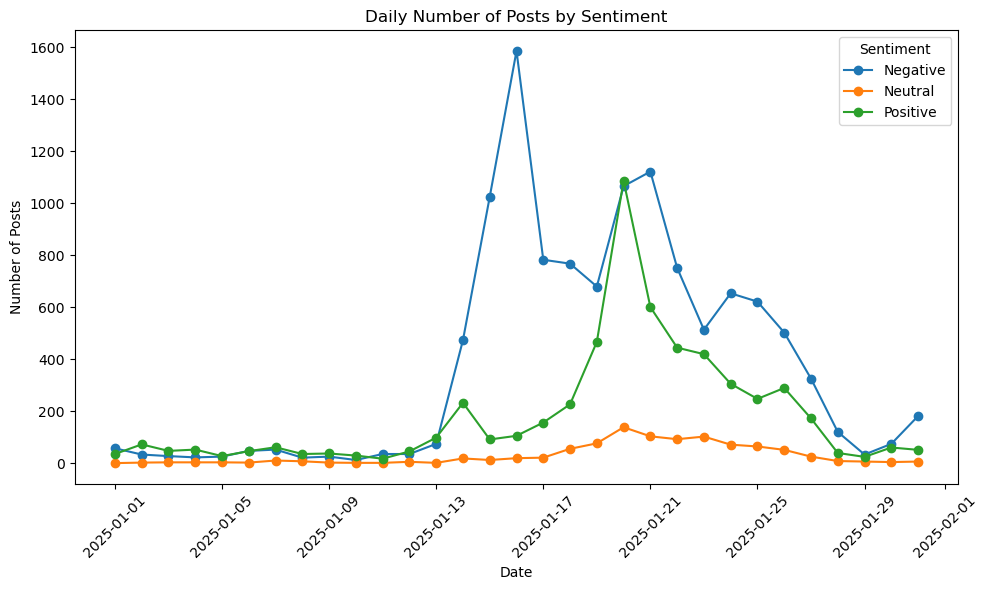

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that your date column is in datetime format
original_topic_df['date'] = pd.to_datetime(original_topic_df['date'])

# Group by date and sentiment, then count the posts
daily_counts = original_topic_df.groupby([original_topic_df['date'].dt.date, 'sentiment']).size().unstack(fill_value=0)

# Plot the daily counts for each sentiment
plt.figure(figsize=(10, 6))
for sentiment in daily_counts.columns:
    plt.plot(daily_counts.index, daily_counts[sentiment], marker='o', label=sentiment.capitalize())

plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Daily Number of Posts by Sentiment')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
